1. Load the standard liabraries and data
2. Audit the data
3. Data preparation and data transformation
4. Data visualisation
5. Data analysis
    1. Univariate
    2. Bi-variate
    3. Multi variate
        1. Classification
            1. KNN
            2. Logistic Regression
            3. RF
            4. GB boost
    4. compare results
    5. create an app


### Import standard Libraries

In [1]:
# %pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency

### Import Data Set

In [3]:
df=pd.read_csv("Mobile_data.csv")

### Audit the Data

In [4]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [7]:
df.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x260edeecb80>,
 'caps': [<matplotlib.lines.Line2D at 0x260edf0b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x260edeec9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x260edf0b700>],
 'fliers': [<matplotlib.lines.Line2D at 0x260edf0b9d0>],
 'means': []}

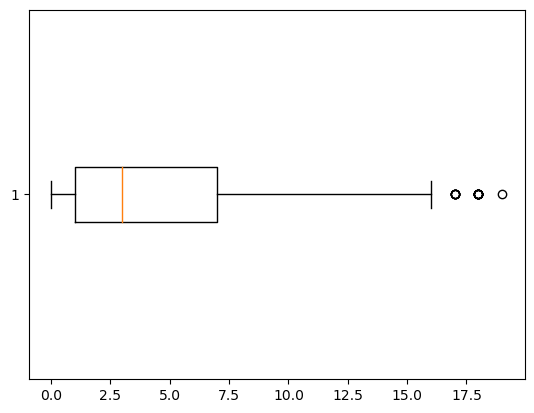

In [8]:
plt.boxplot(df['fc'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x260edf7da30>,
 'caps': [<matplotlib.lines.Line2D at 0x260edf7dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x260edf7d730>],
 'medians': [<matplotlib.lines.Line2D at 0x260edf8d5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x260edf8d880>],
 'means': []}

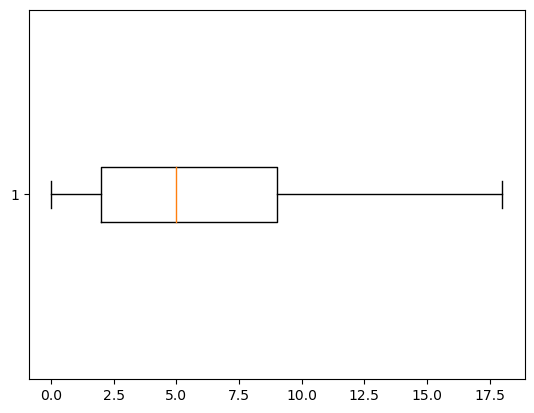

In [9]:
plt.boxplot(df['sc_w'],vert=False)

In [10]:
# sns.pairplot(df)

<AxesSubplot:>

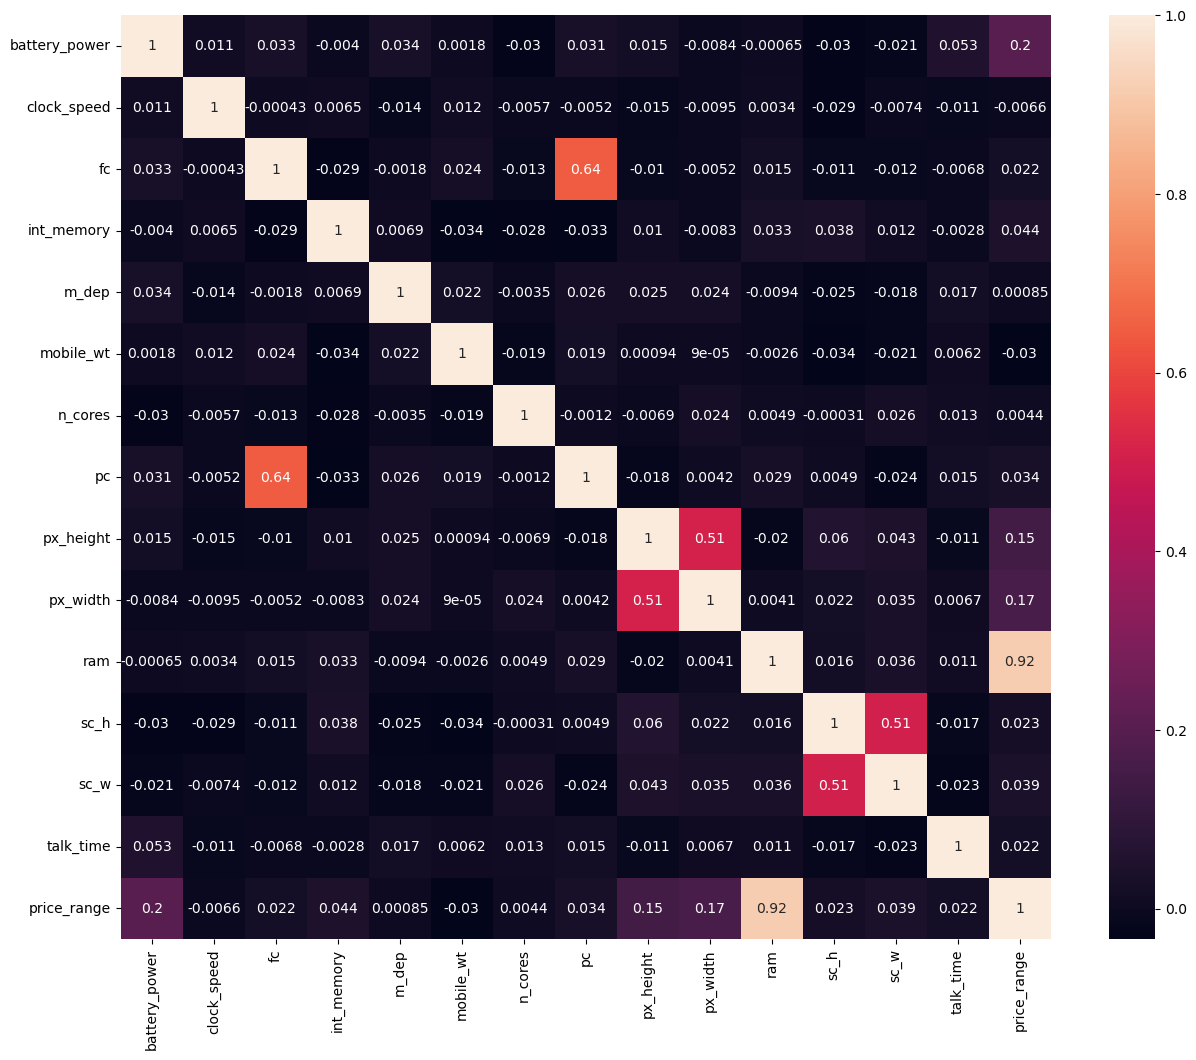

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [12]:
x=df.drop(['price_range'],axis=1)

In [13]:
y=df['price_range']

In [14]:
print(x.shape
,y.shape)

(2000, 14) (2000,)


In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=143,test_size=0.2)

In [16]:
xtrain.shape

(1600, 14)

In [17]:
log=LogisticRegression()

In [18]:
log.fit(xtrain,ytrain)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
preds_train_log=log.predict(xtrain)
preds_test_log=log.predict(xtest)

In [20]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

In [21]:
report(ytrain,preds_train_log)
report(ytest,preds_test_log)

Accuracy of model is 63.06 %

  [[330  76   5   0]
 [ 67 205  97  28]
 [  1  92 188 119]
 [  0   2 104 286]]

               precision    recall  f1-score   support

           0       0.83      0.80      0.82       411
           1       0.55      0.52      0.53       397
           2       0.48      0.47      0.47       400
           3       0.66      0.73      0.69       392

    accuracy                           0.63      1600
   macro avg       0.63      0.63      0.63      1600
weighted avg       0.63      0.63      0.63      1600

Accuracy of model is 64.25 %

  [[71 17  1  0]
 [22 59 19  3]
 [ 0 26 43 31]
 [ 0  1 23 84]]

               precision    recall  f1-score   support

           0       0.76      0.80      0.78        89
           1       0.57      0.57      0.57       103
           2       0.50      0.43      0.46       100
           3       0.71      0.78      0.74       108

    accuracy                           0.64       400
   macro avg       0.64      0.64

In [22]:
dt=DecisionTreeClassifier(max_depth=5,min_samples_split=4)

In [23]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [24]:
preds_train_dt=dt.predict(xtrain)
preds_test_dt=dt.predict(xtest)

In [25]:
report(ytrain,preds_train_dt)
report(ytest,preds_test_dt)

Accuracy of model is 87.31 %

  [[386  25   0   0]
 [ 30 344  23   0]
 [  0  63 315  22]
 [  0   0  40 352]]

               precision    recall  f1-score   support

           0       0.93      0.94      0.93       411
           1       0.80      0.87      0.83       397
           2       0.83      0.79      0.81       400
           3       0.94      0.90      0.92       392

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600

Accuracy of model is 83.75 %

  [[77 12  0  0]
 [ 8 92  3  0]
 [ 0 16 72 12]
 [ 0  0 14 94]]

               precision    recall  f1-score   support

           0       0.91      0.87      0.89        89
           1       0.77      0.89      0.83       103
           2       0.81      0.72      0.76       100
           3       0.89      0.87      0.88       108

    accuracy                           0.84       400
   macro avg       0.84      0.84

In [26]:
rf=RandomForestClassifier(n_estimators=200,max_depth=6)

In [27]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=6, n_estimators=200)

In [28]:
preds_train_rf=rf.predict(xtrain)
preds_test_rf=rf.predict(xtest)

In [29]:
report(ytrain,preds_train_rf)
report(ytest,preds_test_rf)

Accuracy of model is 96.44 %

  [[405   6   0   0]
 [ 11 363  23   0]
 [  0  10 387   3]
 [  0   0   4 388]]

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       411
           1       0.96      0.91      0.94       397
           2       0.93      0.97      0.95       400
           3       0.99      0.99      0.99       392

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600

Accuracy of model is 87.75 %

  [[82  7  0  0]
 [ 7 92  4  0]
 [ 0 15 78  7]
 [ 0  0  9 99]]

               precision    recall  f1-score   support

           0       0.92      0.92      0.92        89
           1       0.81      0.89      0.85       103
           2       0.86      0.78      0.82       100
           3       0.93      0.92      0.93       108

    accuracy                           0.88       400
   macro avg       0.88      0.88

In [30]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.9123)

In [31]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.9123, n_estimators=100)

In [32]:
preds_train_ada=ada.predict(xtrain)
preds_test_ada=ada.predict(xtest)

In [33]:
report(ytrain,preds_train_ada)
report(ytest,preds_test_ada)

Accuracy of model is 79.25 %

  [[371  40   0   0]
 [ 49 243 105   0]
 [  0  17 359  24]
 [  0   0  97 295]]

               precision    recall  f1-score   support

           0       0.88      0.90      0.89       411
           1       0.81      0.61      0.70       397
           2       0.64      0.90      0.75       400
           3       0.92      0.75      0.83       392

    accuracy                           0.79      1600
   macro avg       0.81      0.79      0.79      1600
weighted avg       0.81      0.79      0.79      1600

Accuracy of model is 78.75 %

  [[80  9  0  0]
 [12 67 24  0]
 [ 0  3 87 10]
 [ 0  0 27 81]]

               precision    recall  f1-score   support

           0       0.87      0.90      0.88        89
           1       0.85      0.65      0.74       103
           2       0.63      0.87      0.73       100
           3       0.89      0.75      0.81       108

    accuracy                           0.79       400
   macro avg       0.81      0.79

In [34]:
gdb=GradientBoostingClassifier(learning_rate=0.9)
gdb.fit(xtrain,ytrain)
preds_train_gdb=gdb.predict(xtrain)
preds_test_gdb=gdb.predict(xtest)

In [35]:
report(ytrain,preds_train_gdb)
report(ytest,preds_test_gdb)

Accuracy of model is 100.0 %

  [[411   0   0   0]
 [  0 397   0   0]
 [  0   0 400   0]
 [  0   0   0 392]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       397
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       392

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Accuracy of model is 90.5 %

  [[ 83   6   0   0]
 [  4  94   5   0]
 [  0   7  83  10]
 [  0   0   6 102]]

               precision    recall  f1-score   support

           0       0.95      0.93      0.94        89
           1       0.88      0.91      0.90       103
           2       0.88      0.83      0.86       100
           3       0.91      0.94      0.93       108

    accuracy                           0.91       400
   macro avg      

In [36]:
np.sqrt(len(df))

44.721359549995796

In [37]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(xtrain,ytrain)
preds_train_knn=knn.predict(xtrain)
preds_test_knn=knn.predict(xtest)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [38]:
report(ytrain,preds_train_knn)
report(ytest,preds_test_knn)

Accuracy of model is 93.19 %

  [[404   7   0   0]
 [ 21 365  11   0]
 [  0  30 354  16]
 [  0   0  24 368]]

               precision    recall  f1-score   support

           0       0.95      0.98      0.97       411
           1       0.91      0.92      0.91       397
           2       0.91      0.89      0.90       400
           3       0.96      0.94      0.95       392

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600

Accuracy of model is 94.75 %

  [[ 86   3   0   0]
 [  3  97   3   0]
 [  0   5  92   3]
 [  0   0   4 104]]

               precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.92      0.94      0.93       103
           2       0.93      0.92      0.92       100
           3       0.97      0.96      0.97       108

    accuracy                           0.95       400
   macro avg     

In [39]:
# %pip install gradio

In [40]:
import pickle
import gradio as gr

In [41]:
with open('knn_model.pkl','wb') as f:
    pickle.dump(knn,f)

In [42]:
xtrain.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [43]:
def make_prediction(battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time):
    with open('knn_model.pkl','rb') as f:
        clf=pickle.load(f)
        preds=clf.predict([[battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time]])
        if preds==0:
            return 'Low cost'
        elif preds==1:
            return 'Low-Medium cost'
        elif preds==2:
            return 'Medium-High cost'
        else:
            return 'High cost'           

In [44]:
battery_power=gr.Number(label='Enter battery power')
clock_speed=gr.Number(label='Enter clock speed')
fc=gr.Number(label='Enter front camer pixel')
int_memory=gr.Number(label='Enter internal memory')
m_dep=gr.Number(label='Enter mobile depth')
mobile_wt=gr.Number(label='Enter mobile weight')
n_cores=gr.Number(label='Enter number of cores')
pc=gr.Number(label='Enter pc')
px_height=gr.Number(label='Enter pixel hieght')
px_width=gr.Number(label='Enter pixel Width')
ram=gr.Number(label='Enter ram')
sc_h=gr.Number(label='Enter screen hieght')
sc_w=gr.Number(label='Enter screen width')
talk_time=gr.Number(label='Enter talk time')
output=gr.Textbox()

In [45]:
app=gr.Interface(fn=make_prediction,inputs=[battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time],outputs=output)
app.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


In [46]:
dtrain_clf=xgb.DMatrix(xtrain,ytrain)
dtest_clf=xgb.DMatrix(xtest,ytest)

In [48]:
type(dtrain_clf)

xgboost.core.DMatrix

In [49]:
params={'objective':'multi:softprop','tree_method':'hist','num_class':4}

In [75]:
xgb_classifier=xgb.XGBClassifier(n_estimators=25,max_depth=5,tree_method='hist')

In [76]:
xgb_classifier.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [77]:
preds_train_xgb=xgb_classifier.predict(xtrain)
preds_test_xgb=xgb_classifier.predict(xtest)

In [78]:
report(ytrain,preds_train_xgb)
report(ytest,preds_test_xgb)

Accuracy of model is 100.0 %

  [[411   0   0   0]
 [  0 397   0   0]
 [  0   0 400   0]
 [  0   0   0 392]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       397
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       392

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Accuracy of model is 92.5 %

  [[ 83   6   0   0]
 [  3 100   0   0]
 [  0   8  83   9]
 [  0   0   4 104]]

               precision    recall  f1-score   support

           0       0.97      0.93      0.95        89
           1       0.88      0.97      0.92       103
           2       0.95      0.83      0.89       100
           3       0.92      0.96      0.94       108

    accuracy                           0.93       400
   macro avg      